Roll #0
Current Stake amount: 300
Win!
6
2
The Number of consecutive wins: 1
THe Number of bets: 1
***********************************************************

Roll #1
Current Stake amount: 300
Win!
4
2
The Number of consecutive wins: 2
THe Number of bets: 2
***********************************************************

Roll #2
Current Stake amount: 300
Win!
3
5
The Number of consecutive wins: 3
THe Number of bets: 3
***********************************************************

Roll #3
Current Stake amount: 300
Win!
4
3
The Number of consecutive wins: 4
THe Number of bets: 4
***********************************************************

Roll #4
Current Stake amount: 300
Loss!
Apply a Recovery Factor of 2
5
5
The Number of consecutive wins: 0
THe Number of bets: 5
***********************************************************

Roll #5
Current Stake amount: 600
Win!
3
3
The Number of consecutive wins: 1
THe Number of bets: 6
***********************************************************

Roll #6
Cu

KeyboardInterrupt: 

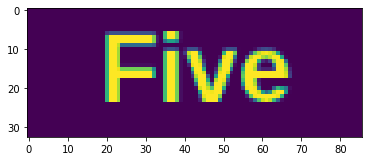

In [2]:
import pytesseract
import cv2
import time
import HelperFunc
import HelperFunc as hf
from selenium import webdriver
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### User Inputs
# user specified amount
user_s_amount = 300
sleeptime = 0
user_numberofwins = 10
recovery_factor = 2
board_type = "mid"


amount_list_sorted =  ['50', '250', '1k', '5k', '25k', '250k', '1m']
data_dict= {'first_dice':[],
            'second_dice': []}
amount_dict = {'amt_region':(1098, 478), '50': (915, 484), '250':(800, 485), 
               '1k':(676, 485), '5k':(553, 485), '25k':(434, 484), 
               '250k': (309, 484), '1m': (184, 484)}

r_stake = (987, 653, 272, 63)

#assert((user_s_amount<7 )and (user_s_amount >= 0) )
assert(recovery_factor>0)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

### Initialize Driver
driver = webdriver.Firefox()
driver.get("https://logigames.bet9ja.com/games.ls?page=launch&gameid=18000&skin=12&sid=&pff=1&tmp=1611946195")
time.sleep(5)
GAME_CANVAS = "layer2"
game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)

### Press Continue
tmp =  HelperFunc.getTemplate("continue")
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
HelperFunc.clickScreen(driver,coord[0])

#balance = HelperFunc.retrieveAmount(driver)

### Select Board
tmp =  HelperFunc.getTemplate(board_type)
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
board_coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
HelperFunc.clickScreen(driver,board_coord[0])

### Select Amount
num_clicks = abs(user_s_amount/50)
hf.setAmount(driver, num_clicks, board_coord)


count  = 0
batch = 1
losses = 0
countstop = 10
wins = 0
amt = user_s_amount
while(1):
    if (count == countstop):
        df =pd.DataFrame(data_dict)
        df.to_csv("Data/Pattern{}".format(batch))
        batch = batch + 1
        count = 0
        wins = 0
        losses = 0
        data_dict= {'first_dice':[],
                    'second_dice': []}
        print("Pattern {} Finished".format(batch))
        driver.close()
        
        ### Initialize Driver
        driver = webdriver.Firefox()
        driver.get("https://logigames.bet9ja.com/games.ls?page=launch&gameid=18000&skin=12&sid=&pff=1&tmp=1611946195")
        time.sleep(5)
        GAME_CANVAS = "layer2"
        game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)

        ### Press Continue
        tmp =  HelperFunc.getTemplate("continue")
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
        HelperFunc.clickScreen(driver,coord[0])
        #balance = HelperFunc.retrieveAmount(driver)


        ### Select Board
        tmp =  HelperFunc.getTemplate(board_type)
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        board_coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
        HelperFunc.clickScreen(driver,board_coord[0])
        
        ### Select Amount
        
        num_clicks = abs(user_s_amount/50)
        setAmount(driver, num_clicks, board_coord)
            
    else:
        ### bet
        print("Roll #{}".format(count))
        tmp =  HelperFunc.getTemplate("rebet")
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        #amt = HelperFunc.retrieveAmount(driver, game_image)
        coord  = HelperFunc.detectTemplate(game_image, tmp, False, 3)
        HelperFunc.clickScreen(driver,(coord[0][0] + 50, coord[0][1] + 50) )
        time.sleep(10)
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        
        plt.imshow(game_image)
       
        print("Current Stake amount: {}".format(amt))
        
        #balance = HelperFunc.retrieveAmount(driver)
        plt.imshow(game_image)

        r1 = (1065, 188, 84, 35)
        r2  = (1160, 189, 86, 33)

        imCrop1 = game_image[int(r1[1]):int(r1[1]+r1[3]), int(r1[0]):int(r1[0]+r1[2])]
        plt.imshow(imCrop1)
        #cv2.imwrite('imgs/tests/im13.jpg', imCrop1)

        imCrop2 = game_image[int(r2[1]):int(r2[1]+r2[3]), int(r2[0]):int(r2[0]+r2[2])]
        plt.imshow(imCrop2)
        ### Preprocess Image
        thresh_image1 = thresholding(imCrop1)
        thresh_image2 = thresholding(imCrop2)

        img1 = np.abs(thresh_image1.astype( int) - 255)
        img2 = np.abs(thresh_image2.astype( int) - 255)

        img1 = np.array(img1).astype('uint8')
        img2 = np.array(img2).astype('uint8')
        
        ### Perform OCR
        custom_config = r'--oem 3 --psm 6'
        str1 = pytesseract.image_to_string(img1, config=custom_config)
        str2 = pytesseract.image_to_string(img2, config=custom_config)
        num1 = HelperFunc.decodeString(str1.split('\n')[0])
        num2 = HelperFunc.decodeString(str2.split('\n')[0])
        
        ### Save Numbers
        data_dict['first_dice'].append(num1)
        data_dict['second_dice'].append(num2)
        count = count + 1

    

        if(board_type == 'lo'):
            if(2<=(num1+ num2) <=5):
                wins = wins + 1
                losses = 0
            else:
                losses = losses + 1
                wins = 0
                print("Loss!")
                print("Apply a Recovery Factor of {}".format(recovery_factor))
                bet_amt = amt *recovery_factor
                num_clicks = abs((bet_amt - amt)/50)
                hf.setAmount(driver, num_clicks, board_coord)

        elif(board_type == 'mid'):
            if(6<=(num1+ num2) <=8):
                wins = wins + 1
                losses = 0
                print("Win!")
                amt = user_s_amount
                time.sleep(5)
                num_clicks = amt/50 + 1 
                hf.setAmount(driver, num_clicks, board_coord)
            else:
                losses = losses + 1
                wins = 0
                print("Loss!")
                print("Apply a Recovery Factor of {}".format(recovery_factor))
                amt = amt *recovery_factor
                num_clicks = amt/50 + 1
                hf.setAmount(driver, num_clicks, board_coord)
                
        elif(board_type == 'hi'):
            if(9<=(num1+ num2) <=12):
                wins = wins + 1
                losses = 0
            else:
                losses = losses + 1
                wins = 0
                print("Loss!")
                print("Apply recovery Factor")
                amt = amt *recovery_factor
                num_clicks = amt/50
                hf.setAmount(driver, num_clicks, board_coord)

        time.sleep(2)
                
        
        print(num1)
        print(num2)
        print("The Number of consecutive wins: {}".format(wins))
        print("THe Number of bets: {}".format(count))
        #print("Current Stake amount: {}".format(amt))
        
        if (wins== user_numberofwins):
            time.sleep(sleeptime)
        print("***********************************************************")
        print()
        

In [ ]:
class LuckyDiceBot:
    amount_list_sorted =  ['50', '250', '1k', '5k', '25k', '250k', '1m']
    data_dict= {'first_dice':[],
            'second_dice': []}
    amount_dict = {'amt_region':(1098, 478), '50': (915, 484), '250':(800, 485), 
               '1k':(676, 485), '5k':(553, 485), '25k':(434, 484), 
               '250k': (309, 484), '1m': (184, 484)}
    user_s_amount = 0
    sleeptime = 0
    user_numberofwins = 0
    recovery_factor = 1
    board_type = "mid"
    
    def __init__(self, name, salary):
        LuckyDiceBot
        LuckyDiceBot
        LuckyDiceBot
        LuckyDiceBot
        LuckyDiceBot
        LuckyDiceBot
    

In [7]:
time.sleep(0)

In [9]:
((1 +1)>= 2) and (5<=(1 +1))

False

In [4]:
driver.close()

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=56273): Max retries exceeded with url: /session/170f0a2d-ae81-4d33-a769-e31972b5652a/window (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc2c45cbd10>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [45]:
img = cv2.imread("imgs/tests/1200.png", 0)

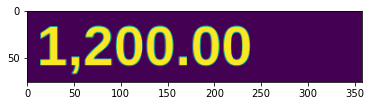

In [46]:
plt.imshow(img)

In [47]:
img.shape

(76, 358)

In [59]:
im1 = hf.thresholding(img)
img1 = np.abs(im1.astype( int) - 255)
img1 = np.array(img1).astype('uint8')
custom_config = r'--oem 3 --psm 6'
string_balance = pytesseract.image_to_string(img1, config=custom_config)
print("OCR String")
print(string_balance)
tmp =  string_balance.split('\n')[0][:-2].replace(',', '').replace(';', '').replace('.','').replace(':', '')

OCR String
1,200.00



In [60]:
tmp

'1200'

In [53]:
string_balance

'1,200.00\n\x0c'

In [28]:
strin = '1;200;00\n\x0c'

In [29]:
strin.split('\n')[0][:-2].replace(',', '').replace(';', '')

'1200'

In [31]:
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)

WebDriverException: Message: Failed to decode response from marionette


In [9]:
board_type = 'hi'

In [10]:
assert((board_type== 'hi')| (board_type =='mid') |(board_type=='lo'))

In [11]:
100%50

0